# UN Millennium Goals- Exploratory Data Analysis

Review and document your data. Perform an exploratory analysis. Verify the quality of your data.

-A well organized IPython notebook with code and output (pdf or html file)

-At least one visual for each independent variable (and any relationships) using a python visualization tool

-Provide insight about data set and its impact on your hypothesis

In [13]:
import numpy as np
import pandas as pd
from sklearn import cross_validation
from sklearn import neighbors
from sklearn import grid_search
from sklearn import metrics

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
%matplotlib inline

import statsmodels.api as sm
import statsmodels.graphics.tsaplots as tsaplots

In [22]:
# Load data
trainingdf = pd.read_csv("TrainingSet.csv", index_col=0) 

# Check head
trainingdf.head()

,1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],1980 [YR1980],1981 [YR1981],...,2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],Country Name,Series Code,Series Name
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.769214,Afghanistan,allsi.bi_q1,(%) Benefits held by 1st 20% population - All ...
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.027746,Afghanistan,allsp.bi_q1,(%) Benefits held by 1st 20% population - All ...
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.244887,Afghanistan,allsa.bi_q1,(%) Benefits held by 1st 20% population - All ...
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.933105,Afghanistan,allsi.gen_pop,(%) Generosity of All Social Insurance
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,18.996814,Afghanistan,allsp.gen_pop,(%) Generosity of All Social Protection


In [43]:
trainingdf.shape

(195402, 39)

In [17]:
submission_labels = pd.read_csv("SubmissionRows.csv", index_col=0)
submission_labels.head()

,2008 [YR2008],2012 [YR2012]
559,NaN,NaN
618,NaN,NaN
753,NaN,NaN
1030,NaN,NaN
1896,NaN,NaN


In [44]:
submission_labels.shape

(737, 2)

In [23]:
# Check columns
# Get numerical columns
num_cols = set(trainingdf.dtypes[((trainingdf.dtypes=="int64")|(trainingdf.dtypes=="float64"))].index)
non_cols = set(trainingdf.columns)-num_cols

print "Numerical columns:"
print num_cols
print "Non-numerical columns:"
print non_cols

Numerical columns:
set(['1981 [YR1981]', '1999 [YR1999]', '1982 [YR1982]', '2004 [YR2004]', '1973 [YR1973]', '1980 [YR1980]', '1972 [YR1972]', '1996 [YR1996]', '1978 [YR1978]', '2000 [YR2000]', '1995 [YR1995]', '1986 [YR1986]', '1994 [YR1994]', '1976 [YR1976]', '1979 [YR1979]', '1992 [YR1992]', '2002 [YR2002]', '1991 [YR1991]', '1990 [YR1990]', '1975 [YR1975]', '2005 [YR2005]', '2006 [YR2006]', '1983 [YR1983]', '1989 [YR1989]', '1988 [YR1988]', '1977 [YR1977]', '1985 [YR1985]', '1984 [YR1984]', '1997 [YR1997]', '2007 [YR2007]', '1974 [YR1974]', '2001 [YR2001]', '1987 [YR1987]', '1993 [YR1993]', '1998 [YR1998]', '2003 [YR2003]'])
Non-numerical columns:
set(['Series Code', 'Country Name', 'Series Name'])


In [24]:
trainingdf.describe() #not useful since dataframe is flipped

,1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],1980 [YR1980],1981 [YR1981],...,1998 [YR1998],1999 [YR1999],2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007]
count,6.494500e+04,6.444300e+04,6.496600e+04,6.697300e+04,6.771700e+04,6.973500e+04,6.976300e+04,6.990600e+04,7.525000e+04,7.803400e+04,...,1.259440e+05,1.308800e+05,1.405470e+05,1.367830e+05,1.403150e+05,1.391590e+05,1.423790e+05,1.615440e+05,1.588880e+05,1.615960e+05
mean,1.630638e+11,1.839488e+11,2.089534e+11,2.148826e+11,2.321517e+11,2.413682e+11,2.540583e+11,2.742810e+11,2.674858e+11,2.774415e+11,...,7.079045e+11,7.214590e+11,7.396189e+11,8.236331e+11,8.834342e+11,9.691983e+11,1.054572e+12,1.057680e+12,1.203163e+12,1.353147e+12
std,4.261616e+12,4.749746e+12,5.378336e+12,5.647070e+12,6.120314e+12,6.398377e+12,6.710724e+12,7.213662e+12,7.381164e+12,7.942777e+12,...,1.927225e+13,1.975110e+13,2.055262e+13,2.240717e+13,2.412411e+13,2.612031e+13,2.874833e+13,3.047457e+13,3.469590e+13,4.002108e+13
min,-1.047939e+14,-1.128889e+14,-7.134161e+13,-8.269588e+13,-9.735652e+13,-9.433422e+13,-9.495898e+13,-5.362479e+13,-5.649790e+13,-5.437839e+13,...,-1.014742e+14,-9.646140e+13,-9.216180e+13,-6.621060e+13,-5.635700e+13,-1.853552e+14,-1.515222e+14,-1.350005e+14,-1.422689e+14,-1.691820e+14
25%,3.176702e+00,3.550009e+00,4.000000e+00,3.671917e+00,4.595300e+00,5.000000e+00,4.901495e+00,5.000000e+00,5.682373e+00,5.000000e+00,...,4.902281e+00,5.264969e+00,5.304083e+00,5.249579e+00,5.269189e+00,5.500000e+00,5.460000e+00,5.206670e+00,5.206982e+00,5.000000e+00
50%,6.394000e+01,6.631737e+01,7.048563e+01,7.188613e+01,7.456354e+01,7.894462e+01,7.863808e+01,8.140866e+01,8.182969e+01,7.813717e+01,...,6.423599e+01,6.570000e+01,6.270796e+01,6.391600e+01,6.330000e+01,6.452287e+01,6.290620e+01,5.737856e+01,5.547417e+01,5.504303e+01
75%,5.007000e+06,7.131000e+06,9.250000e+06,1.108200e+07,1.290000e+07,1.540950e+07,1.922850e+07,2.409375e+07,2.419225e+07,2.317875e+07,...,1.870445e+07,1.300000e+07,6.544000e+06,1.038850e+07,9.278000e+06,1.200000e+07,1.066050e+07,8.484250e+06,1.025022e+07,8.599101e+06
max,2.681335e+14,2.943467e+14,3.186506e+14,3.383541e+14,3.586152e+14,3.895869e+14,4.254506e+14,4.556262e+14,5.039050e+14,5.815794e+14,...,1.348416e+15,1.324599e+15,1.389770e+15,1.646322e+15,1.821833e+15,2.013675e+15,2.295826e+15,2.774281e+15,3.339217e+15,3.950893e+15


In [25]:
# check for missing values in each column before dropping
print "Missing values:"
print trainingdf.isnull().sum()

Missing values:
1972 [YR1972]    130457
1973 [YR1973]    130959
1974 [YR1974]    130436
1975 [YR1975]    128429
1976 [YR1976]    127685
1977 [YR1977]    125667
1978 [YR1978]    125639
1979 [YR1979]    125496
1980 [YR1980]    120152
1981 [YR1981]    117368
1982 [YR1982]    116386
1983 [YR1983]    116420
1984 [YR1984]    115870
1985 [YR1985]    114385
1986 [YR1986]    113947
1987 [YR1987]    112650
1988 [YR1988]    112160
1989 [YR1989]    109071
1990 [YR1990]     88447
1991 [YR1991]     88411
1992 [YR1992]     83159
1993 [YR1993]     80849
1994 [YR1994]     78579
1995 [YR1995]     70934
1996 [YR1996]     71028
1997 [YR1997]     69716
1998 [YR1998]     69458
1999 [YR1999]     64522
2000 [YR2000]     54855
2001 [YR2001]     58619
2002 [YR2002]     55087
2003 [YR2003]     56243
2004 [YR2004]     53023
2005 [YR2005]     33858
2006 [YR2006]     36514
2007 [YR2007]     33806
Country Name          0
Series Code           0
Series Name           0
dtype: int64


In [26]:
# drop missing values if there are any
if trainingdf.isnull().sum().sum():
    print "There are missing values"
    df_nona = df.dropna()
    print "Missing values dropped"

There are missing values
Missing values dropped


In [9]:
# re-check for missing values in each column after dropping
print "Missing values:"
print df_nona.isnull().sum()

Missing values:
Unnamed: 0       0
1972 [YR1972]    0
1973 [YR1973]    0
1974 [YR1974]    0
1975 [YR1975]    0
1976 [YR1976]    0
1977 [YR1977]    0
1978 [YR1978]    0
1979 [YR1979]    0
1980 [YR1980]    0
1981 [YR1981]    0
1982 [YR1982]    0
1983 [YR1983]    0
1984 [YR1984]    0
1985 [YR1985]    0
1986 [YR1986]    0
1987 [YR1987]    0
1988 [YR1988]    0
1989 [YR1989]    0
1990 [YR1990]    0
1991 [YR1991]    0
1992 [YR1992]    0
1993 [YR1993]    0
1994 [YR1994]    0
1995 [YR1995]    0
1996 [YR1996]    0
1997 [YR1997]    0
1998 [YR1998]    0
1999 [YR1999]    0
2000 [YR2000]    0
2001 [YR2001]    0
2002 [YR2002]    0
2003 [YR2003]    0
2004 [YR2004]    0
2005 [YR2005]    0
2006 [YR2006]    0
2007 [YR2007]    0
Country Name     0
Series Code      0
Series Name      0
dtype: int64


In [50]:
trainingdf["Country Name"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt, Arab Rep.', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Ethiopia', 'Faeroe Islands', 'Fiji', 'Finland',
       'France', 

In [52]:
trainingdf["Series Name"].unique() 

array(['(%) Benefits held by 1st 20% population - All Social Insurance',
       '(%) Benefits held by 1st 20% population - All Social Protection',
       '(%) Benefits held by 1st 20% population - All Social Safety Nets',
       ..., 'Net official flows from UN agencies, UNPBF (current US$)',
       'Net official flows from UN agencies, UNRWA (current US$)',
       'Presence of peace keepers (number of troops, police, and military observers in mandate)'], dtype=object)

In [42]:
df_nona.shape #drop columns instead? Have submission rows been lost?

(54902, 39)

In [20]:
#to more easily reference year (from DataDriven)

def generate_year_list(start, stop=None):
    """ 
    make a list of column names for specific years
    in the format they appear in the data frame start/stop inclusive
    """
    
    if isinstance(start, list):
        data_range = start
    elif stop:
        data_range = range(start, stop+1)
    else:
        data_range = [start]
    
    yrs = []
    
    for yr in data_range:
        yrs.append("{0} [YR{0}]".format(yr))
        
    return yrs

In [62]:
#looking at just submission rows
prediction_rows = trainingdf.loc[submission_labels.index]
prediction_rows["Country Name"].unique()


array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt, Arab Rep.', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Ethiopia', 'Faeroe Islands', 'Fiji', 'Finland',
       'France', 'French Polynesia', 'Gabon', 'Gambia, The', 'Georgia',


In [64]:
prediction_rows_yearsonly = prediction_rows[generate_year_list(1972, 2007)]
prediction_rows_yearsonly.head()

,1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],1980 [YR1980],1981 [YR1981],...,1998 [YR1998],1999 [YR1999],2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007]
559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.1520,0.1870,0.2210,0.256000,0.291000,0.325000,0.360000,0.395000,0.430000,0.4650
618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000047,0.000046,0.000879,0.001058,0.012241,0.021071,0.0190
753,0.296,0.2909,0.2852,0.2798,0.2742,0.2683,0.2624,0.2565,0.2503,0.2439,...,0.1391,0.1366,0.1339,0.131000,0.127700,0.124400,0.121000,0.117700,0.114500,0.1115
1030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0010,0.0010,0.0010,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.0010
1896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.9650,0.9650,0.9650,0.964000,0.964000,0.963000,0.963000,0.962000,0.962000,0.9610


In [65]:
prediction_rows.head()

,1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],1980 [YR1980],1981 [YR1981],...,2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],Country Name,Series Code,Series Name
559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.256000,0.291000,0.325000,0.360000,0.395000,0.430000,0.4650,Afghanistan,7.8,Ensure environmental sustainability
618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000047,0.000046,0.000879,0.001058,0.012241,0.021071,0.0190,Afghanistan,8.16,Develop a global partnership for development: ...
753,0.296,0.2909,0.2852,0.2798,0.2742,0.2683,0.2624,0.2565,0.2503,0.2439,...,0.131000,0.127700,0.124400,0.121000,0.117700,0.114500,0.1115,Afghanistan,4.1,Reduce child mortality
1030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.0010,Afghanistan,6.1,Combat HIV/AIDS
1896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.964000,0.964000,0.963000,0.963000,0.962000,0.962000,0.9610,Albania,7.8,Ensure environmental sustainability


In [29]:
prediction_rows.describe()

,1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],1980 [YR1980],1981 [YR1981],...,1998 [YR1998],1999 [YR1999],2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007]
count,172.000000,170.000000,170.000000,179.000000,186.000000,192.000000,195.000000,200.000000,201.000000,213.000000,...,675.000000,701.000000,714.000000,713.000000,715.000000,713.000000,713.000000,726.000000,725.000000,737.000000
mean,0.219937,0.207817,0.203128,0.189418,0.198788,0.203314,0.195784,0.201251,0.193704,0.199689,...,0.263330,0.286637,0.302485,0.306344,0.318082,0.327260,0.334718,0.343434,0.352864,0.361211
std,0.263087,0.253884,0.256467,0.247787,0.264639,0.269425,0.260019,0.274549,0.272135,0.280679,...,0.363003,0.374184,0.378456,0.378707,0.381181,0.383393,0.383628,0.385937,0.387891,0.390645
min,0.012200,0.011600,0.010900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000004,0.000002,0.000059,0.000003,0.000000,0.000170,0.000170,0.000100,0.000120,0.000060
25%,0.056925,0.053775,0.050825,0.043250,0.040950,0.039575,0.037150,0.034100,0.030800,0.029300,...,0.007000,0.008454,0.011800,0.012400,0.015100,0.015300,0.015500,0.016800,0.018000,0.018000
50%,0.132700,0.127250,0.119350,0.107400,0.109250,0.108100,0.106900,0.102450,0.094700,0.091800,...,0.041400,0.052700,0.070743,0.076123,0.085181,0.092325,0.102600,0.112400,0.120000,0.123700
75%,0.237075,0.228500,0.221250,0.213350,0.213675,0.217850,0.208500,0.210875,0.199100,0.197586,...,0.533000,0.610000,0.663500,0.668000,0.703350,0.752000,0.744000,0.770868,0.794000,0.802000
max,0.999836,0.991109,0.992353,0.997470,0.999596,0.999627,0.999718,0.999843,0.999532,0.999560,...,1.000000,0.999986,0.999702,0.999746,0.999751,0.999956,0.999657,0.999986,0.999762,0.999992


C:\Users\Heather\Anaconda\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


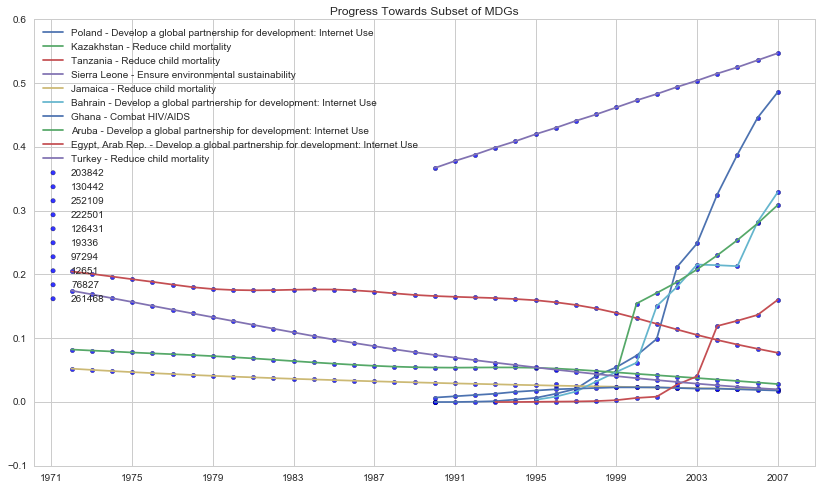

In [40]:
# Modified from DataDriven example
# grab a random sample of 10 of the timeseries
plt.rcParams['figure.figsize'] = (14.0, 8.0)
np.random.seed(896)
rand_rows = np.random.choice(prediction_rows.index.values, size=10)

def plot_rows(data, ids=None, linestyle="-", legend=True):
      
    if not None == ids:
        get_rows = lambda: enumerate(ids)
    else:
        get_rows = lambda: enumerate(data.index.values)
    
    for i, r in get_rows():
        # get the time series values
        time_data = data.loc[r]

        # create an x axis to plot along
        just_years = [y[:4] for y in data.columns]
        X = pd.DatetimeIndex(just_years)

        # get time series info for labeling
        country, descrip = trainingdf[["Country Name", "Series Name"]].loc[r]

        # plot the series
        plt.plot(X, time_data,
                 label="{} - {}".format(country, descrip), ls=linestyle)
        plt.scatter(X, time_data, alpha=0.8)

    if legend:
        plt.legend(loc=0)
    plt.title("Progress Towards Subset of MDGs")

plot_rows(prediction_rows, ids=rand_rows)
plt.show()

Narrowing in on one country:  Sierra Leone

In [59]:
sl_data = trainingdf[trainingdf["Country Name"] == 'Sierra Leone']
sl_values = sl_data[generate_year_list(1972, 2007)].values

# get the total number of time series we have for Sierra Leone
nseries = sl_values.shape[0]
print nseries

1073


In [73]:
#predictions for Sierra Leone
sl_pred_rows = prediction_rows[prediction_rows["Country Name"] == 'Sierra Leone']
sl_pred_rows

,1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],1980 [YR1980],1981 [YR1981],...,2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],Country Name,Series Code,Series Name
222501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.483000,0.494000,0.504000,0.51500,0.525000,0.536000,0.547000,Sierra Leone,7.8,Ensure environmental sustainability
222560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.001603,0.001762,0.001902,0.00203,0.002154,0.002277,0.002398,Sierra Leone,8.16,Develop a global partnership for development: ...
222695,0.3195,0.3146,0.3095,0.3048,0.3006,0.2964,0.2926,0.2884,0.2849,0.2812,...,0.230800,0.227100,0.223400,0.21940,0.215600,0.211700,0.207400,Sierra Leone,4.1,Reduce child mortality
222972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.010000,0.012000,0.013000,0.01500,0.016000,0.016000,0.017000,Sierra Leone,6.1,Combat HIV/AIDS


In [61]:
# -1 as default
lag_corr_mat = np.ones([nseries, nseries], dtype=np.float64)*-1

# create a matrix to hold our lagged correlations
for i in range(nseries):
    for j in range(nseries):
        # skip comparing a series with itself
        if i!=j:
            # get original (1972-2006) and shifted (1973-2007)
            original = sl_values[i,1:]
            shifted = sl_values[j,:-1]

            # for just the indices where neither is nan
            non_nan_mask = (~np.isnan(original) & ~np.isnan(shifted))

            # if we have at least 2 data points
            if non_nan_mask.sum() >= 2:
                lag_corr_mat[i,j] = np.correlate(original[non_nan_mask], shifted[non_nan_mask])

In [74]:
# Ensure environmental Sustainability in Sierra Leone
to_predict_ix = 222501

# first, we get the index of that row in the correlation matrix
i = np.where(sl_data.index.values == to_predict_ix)[0][0]

# then, we see which value in the matrix is the largest for that row
j_max = np.argmax(lag_corr_mat[i,:])

# finally, let's see what these correspond to
max_corr_ix = sl_data.index.values[j_max]

# now write out what we've found
fmt_string = "In Sierra Leone, the progress of '{}' is "\
    "most correlated with a change in '{}' during the year before."
    
print fmt_string.format(sl_data["Series Name"][to_predict_ix], sl_data["Series Name"][max_corr_ix])

In Sierra Leone, the progress of 'Ensure environmental sustainability' is most correlated with a change in 'Gross national expenditure (constant LCU)' during the year before.


With over 100k variables, graphing each is impractical.  Here I have recreated a graph of a few of the variables.  Due to missing data, creating a model with all of the data will be a challenge.  I decided to take a closer look at a single country, Sierra Leone.  The analysis of prior year impact indicates that variables outside of the area of interest may have the strongest relationship, and so taking a subset of the data related to a single Series code (or area of interest) would not be appropriate.  

Going forward:  One option is to create an algorithm that for each prediction, use only years with collected data to create its predictive model.  Another is to populate NaN's with the mean for the row.  For the latter, it may be more efficient to transpose the data so that years are as rows.  The most straight forward option would be to truncate the training dataset to the years with the most data.  From this initial analysis, it appears that data related to reducing child mortality is the only data reaching as far back as 1972, while other data collection began in the late 1980s- early 1990s.  